# FIRST STEPS

## Importing dataFrame

In [74]:
import numpy as np
import pandas as pd

# Gist(CSV dataFrame): 'https://gist.github.com/ahcamachod/a572cfcc2527046db93101f88011b26e'
# Adjuntamos ruta 'raw' DE GIST
url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'

# Lectura de datos
df = pd.read_csv(url, sep=';') # utilizo ';' ya que segun el dataframe estan separados por ese símbolo.
df.head() # visualizacion solo de las 5 primeras filas


,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [75]:
# Tomamos una muestra aleatoria de 10 filas del dataframe
df.sample(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
2006,Departamento,Lomas de Chapultepec,3,1,1,100,35000.0,6650.0,962.5
1104,Departamento,Condesa,3,1,0,380,15750.0,6930.0,NaN
484,Conjunto Comercial/Sala,Centro Histórico,0,0,0,576,100957.5,31297.0,7248.5
23682,Departamento,Coyoacán,3,2,2,186,98000.0,10325.0,34300.0
17121,Departamento,Santa Fe,2,1,1,55,3850.0,2975.0,490.0
24916,Departamento,Bosques de las Lomas,4,3,1,165,28000.0,5600.0,2005.5
18407,Departamento,Condesa,1,0,0,27,8750.0,1925.0,70.0
1122,Departamento,Condesa,3,1,0,140,12250.0,3500.0,420.0
13992,Departamento,Condesa,3,1,1,138,15750.0,6300.0,647.5
13235,Departamento,Coyoacán,2,1,2,92,26250.0,12250.0,3500.0


In [76]:
# Verificando el tipo de datos, efectivamente es un dataFrame
type(df)

pandas.core.frame.DataFrame

## Analysis data exploration

In [77]:
df.sample(5)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
16570,Departamento,Narvarte,2,1,0,64,5775.0,2684.5,231.0
12256,Departamento,Lomas de Chapultepec,3,1,0,122,21700.0,4648.0,NaN
16173,Conjunto Comercial/Sala,Santa Fe,0,1,0,30,2800.0,2520.0,2065.0
18556,Conjunto Comercial/Sala,Centro Histórico,0,0,0,300,63000.0,8750.0,2432.5
3147,Departamento,La Florida,2,1,1,66,4200.0,1575.0,224.0


In [78]:
# Verificacion de la cantidad de dimensiones del array
df.shape

(25121, 9)

In [79]:
# Verificamos las etiquetas de las columnas
df.columns

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [80]:
# Resumen de los datos analizados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [81]:
# Verificacion por columna del tipo de dato contenida en ella (columna)
df['Colonia']

0                     Condesa
1                     Polanco
2                    Santa Fe
3            Centro Histórico
4                   Del Valle
                 ...         
25116        Centro Histórico
25117        Centro Histórico
25118                 Mixcoac
25119    Lomas de Chapultepec
25120        Centro Histórico
Name: Colonia, Length: 25121, dtype: object

In [82]:
# Verificación de los tipos de datos de dos columnas
df[['Area','Valor']]  # solamente ['Area','Valor'] es una tupla, se tiene que pasar una lista 

,Area,Valor
0,40,5950.0
1,100,24500.0
2,150,18200.0
3,15,2800.0
4,48,2800.0
...,...,...
25116,755,49000.0
25117,27,2800.0
25118,48,4900.0
25119,70,10500.0


# MACHINE LEARNING TASKS

## Average & porcentages

### Valores promedio de alquiler por tipo de inmueble (residencial)

In [83]:
# Ver primeras filas
df.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [84]:
# Suma de todos los valores de el dataframe
df['Valor'].mean()

np.float64(36885.05048392878)

In [85]:
print(df.dtypes)

Tipo             object
Colonia          object
Habitaciones      int64
Garages           int64
Suites            int64
Area              int64
Valor           float64
Condominio      float64
Impuesto        float64
dtype: object


In [86]:
# ¿Cuáles son los valores promedio de alquiler por tipo de propiedad?
df.groupby('Tipo').mean(numeric_only=True) # 'False' por defecto
# 'numeric_only=True : Arg que fuerza el calculo solo en las columnas de tipo numerico

# Muy general, solo veremos la columna de 'VALOR'


,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
Tipo,,,,,,,
Casa,3.359633,1.897248,1.438532,289.943119,31453.177064,3699.421642,6629.404851
Casa Comercial,1.801980,2.118812,0.257426,370.277228,54735.841584,7622.192308,6166.063380
Casa de Condominio,4.319672,3.555738,3.247541,566.303279,51428.609836,5286.578804,15046.939394
Casa de Vecindad,1.974684,0.379747,0.215190,79.981013,5961.740506,413.444444,706.850000
Cochera/Estacionamiento,0.064935,1.376623,0.000000,18.662338,6995.454545,1069.075000,449.458333
Cocineta,0.836088,0.020661,0.041322,29.090909,4425.856061,1521.734214,280.701461
Conjunto Comercial/Sala,0.047175,2.686323,0.000352,236.323711,57675.214550,17489.361142,5425.980245
Departamento,2.504199,1.256367,0.891899,124.014292,18683.269431,6797.092951,2634.921081
Departamento en Hotel,1.419780,0.969231,0.758242,65.848352,16285.430769,7250.650602,1768.923885


In [87]:
df.groupby('Tipo')['Valor'].mean() 
# Retiramos el valor 'True' porque estamos seleccionando una columna de números (Seria redundante)
# Esta operacion devuelve una serie con la Columna 'Valor' y su Índice 'Tipo'

Tipo
Casa                           31453.177064
Casa Comercial                 54735.841584
Casa de Condominio             51428.609836
Casa de Vecindad                5961.740506
Cochera/Estacionamiento         6995.454545
Cocineta                        4425.856061
Conjunto Comercial/Sala        57675.214550
Departamento                   18683.269431
Departamento en Hotel          16285.430769
Edificio Completo             409418.080645
Estudio                         8400.000000
Galpón/Depósito/Almacén       299984.140138
Hotel                          87500.000000
Industria                     420000.000000
Loft                            9924.526316
Loteo/Condominio               92166.666667
Posada/Chalé                    5180.000000
Rancho                         38014.375000
Terreno Estándar              135364.444444
Tienda en Centro Comercial     32556.785714
Tienda/Salón                   56263.544252
Name: Valor, dtype: float64

In [88]:
# Verificamos el tipo de dato
type(df.groupby('Tipo')['Valor'].mean() )

pandas.core.series.Series

In [89]:
# Esta operacion SI devuelve un dataframe y organizarlos en orden ascendente
df.groupby('Tipo')[['Valor']].mean().sort_values('Valor') 

,Valor
Tipo,
Cocineta,4425.856061
Posada/Chalé,5180.000000
Casa de Vecindad,5961.740506
Cochera/Estacionamiento,6995.454545
Estudio,8400.000000
Loft,9924.526316
Departamento en Hotel,16285.430769
Departamento,18683.269431
Casa,31453.177064


In [90]:
# Verificamos el tipo de dato
type(df.groupby('Tipo')[['Valor']].mean() )

pandas.core.frame.DataFrame

<Axes: ylabel='Tipo'>

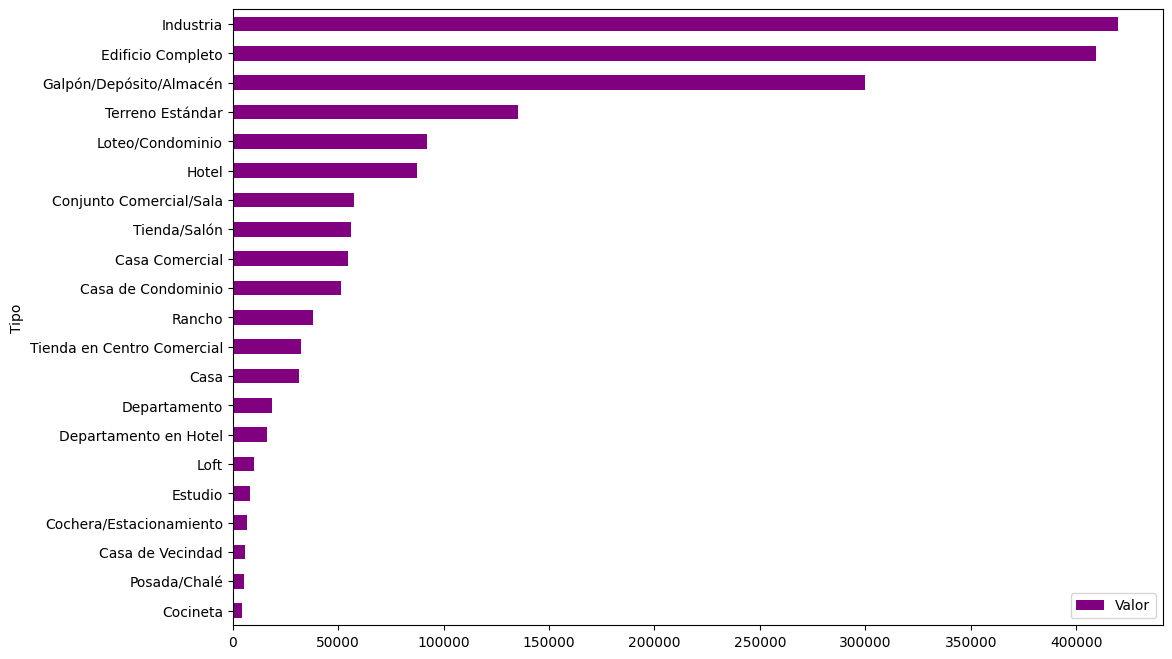

In [91]:
# Asignamos variable que devuelva un DataFrame con solo dos columnas 
# → df[['Tipo', 'Valor']]
df_tipo_valor = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor') 

# Grafico del DataFrame
df_tipo_valor.plot(kind='barh', figsize=(12,8), color= 'purple')

In [92]:
# Verificamos las diferentes tipos de inmuebles en la serie 'Tipo'
# solo debemos verificar los inmuebles residenciales.
df['Tipo'].unique() # df.Tipo.unique() → es similar

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [93]:
# Asignación de variable para inmuebles comerciales
inmuebles_comerciales = [
    'Conjunto Comercial/Sala', 'Edificio Completo', 'Tienda/Salón',
    'Casa Comercial', 'Terreno Estándar', 'Cochera/Estacionamiento',
    'Galpón/Depósito/Almacén','Tienda en Centro Comercial', 'Hotel',
    'Loteo/Condominio', 'Industria'
]

# Filtramos el dataFrame para tener un dataframe nuevo donde no incluya ('not in') las 
# filas que contengan las entradas que son identicas a las almacenadas en 
# la variable externa 'inmuebles_comerciales' (por ello anteponemos un arroba @)
df.query('@inmuebles_comerciales not in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25115,Casa de Condominio,Santa Fe,5,3,4,450,52500.0,5988.5,8162.0
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [94]:
# Generamos un nuevo dataFrame con solo los locales residenciales
new_df = df.query('@inmuebles_comerciales not in Tipo')
new_df.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN


Generacion de un nuevo gráfico con los valores residenciales utilizando el nuevo dataframe **new_df**
(Utilizamos la info de la celda 22)

<Axes: ylabel='Tipo'>

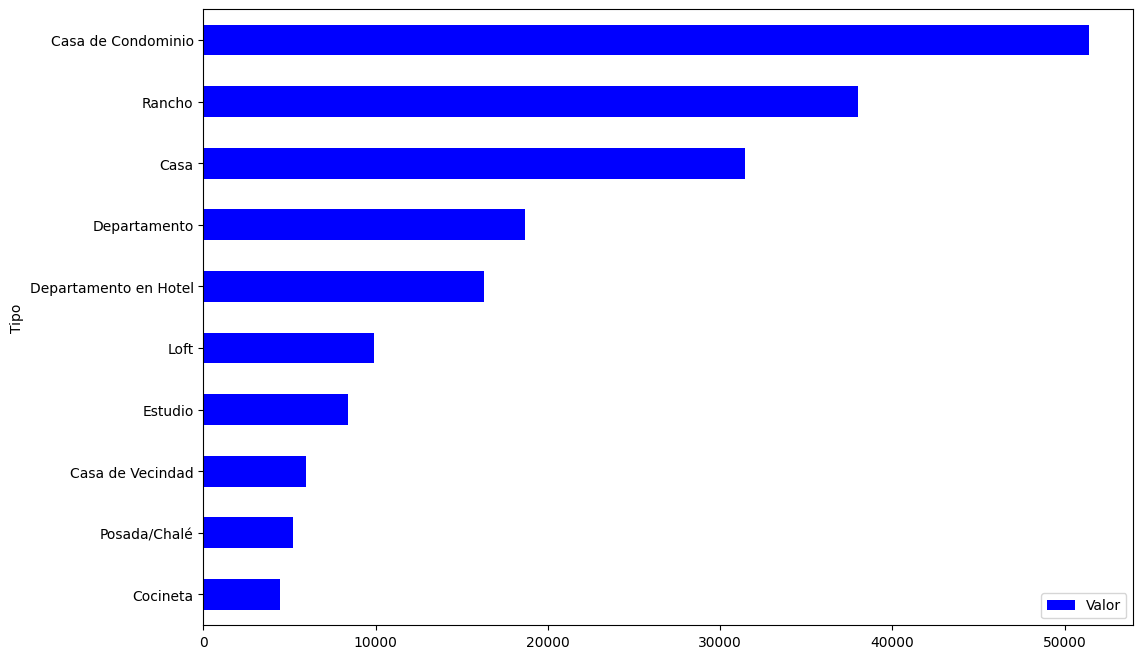

In [95]:
# Asignamos variable que devuelva un DataFrame con solo dos columnas 
# → df[['Tipo', 'Valor']]
df_tipo_valor = new_df.groupby('Tipo')[['Valor']].mean().sort_values('Valor') 

# Grafico del DataFrame
df_tipo_valor.plot(kind='barh', figsize=(12,8), color= 'blue')

### Porcentaje de cada tipo de inmueble (residenciales) presente en la base de datos

In [96]:
# Verificamos las diferentes tipos de inmuebles en la serie 'Tipo'
new_df['Tipo'].unique() # df.Tipo.unique() → es similar

array(['Cocineta', 'Casa', 'Departamento', 'Casa de Condominio',
       'Departamento en Hotel', 'Casa de Vecindad', 'Loft', 'Rancho',
       'Posada/Chalé', 'Estudio'], dtype=object)

In [97]:
# Verificamos la cantidad de valores (entradas o filas) de cada tipo
new_df.Tipo.value_counts()

Tipo
Departamento             14764
Cocineta                   726
Casa de Condominio         610
Casa                       545
Departamento en Hotel      455
Casa de Vecindad           158
Loft                        38
Rancho                       8
Estudio                      4
Posada/Chalé                 1
Name: count, dtype: int64

In [98]:
# Verificamos los porcentajes de cada tipo de inmueble residencial
new_df.Tipo.value_counts(normalize=True)

Tipo
Departamento             0.852967
Cocineta                 0.041943
Casa de Condominio       0.035242
Casa                     0.031487
Departamento en Hotel    0.026287
Casa de Vecindad         0.009128
Loft                     0.002195
Rancho                   0.000462
Estudio                  0.000231
Posada/Chalé             0.000058
Name: proportion, dtype: float64

<Axes: xlabel='Tipo de inmueeble', ylabel='Porcentaje'>

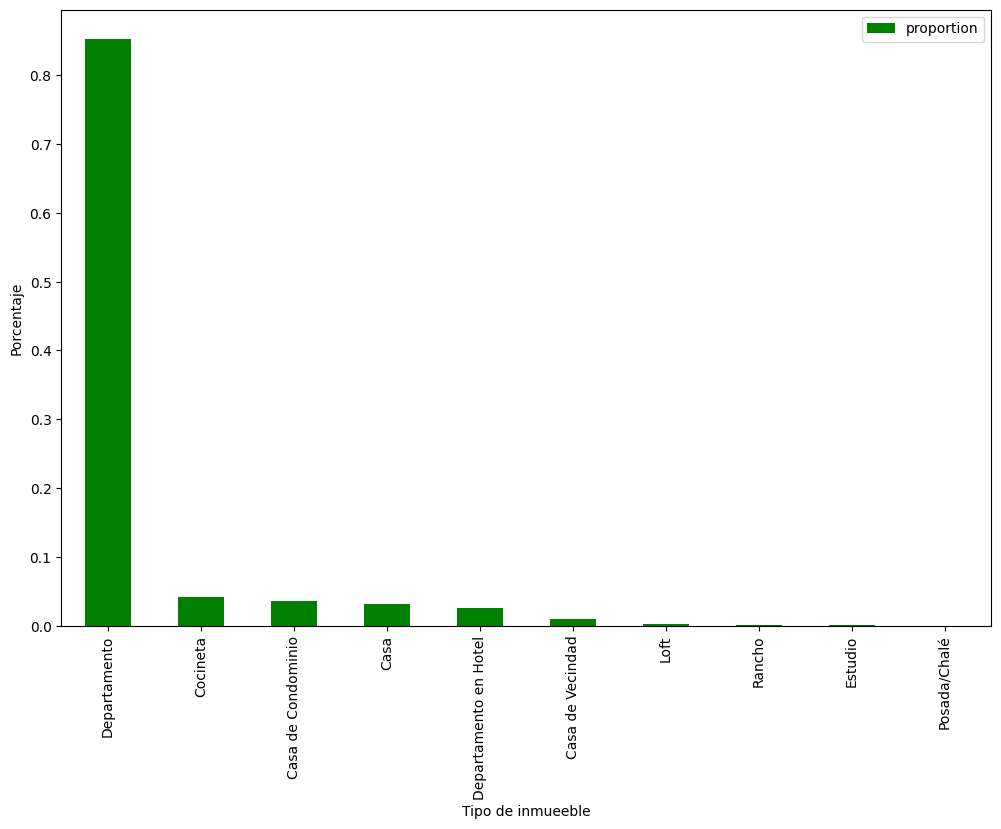

In [99]:
# Graficamos los porcentajes de cada tipo de inmueble residencial
porcentaje_tipo = new_df.Tipo.value_counts(normalize=True).to_frame()
porcentaje_tipo.plot(kind='bar', figsize=(12,8), color = 'green',xlabel='Tipo de inmueeble', ylabel= 'Porcentaje')

In [100]:
# Generamos un nuevo dataFrame segregandolo con solo los `departamentos` ya que al consultarse con el equipo de ML
# solo quieren los datos de esta serie de los `inmuebles residenciales`
new_df.query('Tipo == "Departamento"')

# reasignamos la misma variable al nuevo DataFrame
new_df = new_df.query('Tipo == "Departamento"')
new_df.head(4)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0


In [101]:
new_df.shape

(14764, 9)

## Desafio extra

### Calcular el **promedio de habitaciones por departamento**: 
Es necesario obtener el número promedio de habitaciones para cada departamento en el conjunto de datos.

In [102]:
# Visualizamos el nuevo DataFrame
new_df

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [103]:
new_df.groupby('Tipo')['Habitaciones'].mean()

Tipo
Departamento    2.504199
Name: Habitaciones, dtype: float64

### Verificar el número de colonias únicas:
- Se debe contar la cantidad de colonias distintas que existen en la base de datos.

In [104]:
new_df.groupby('Colonia')['Valor'].mean()

Colonia
Ajusco                17150.000000
Arboledas              4050.156250
Atlalilco              4360.000000
Atlampa                4211.666667
Barrio Bravo           3129.000000
                          ...     
Villa Coapa            3442.600000
Villa de Cortés        3885.795455
Villa de Guadalupe     4633.548387
Zacatenco              4123.000000
Álvaro Obregón         3188.333333
Name: Valor, Length: 83, dtype: float64

In [105]:
# Visualizamos el tamaño del dataFrame
new_df.groupby('Colonia')['Valor'].mean().shape
# resultado: 83 filas, 1 columna

(83,)

In [106]:
# Verificamos la cantidad de colonias con datos de alquiler
len(new_df.groupby('Colonia')['Valor'].mean())

83

### Analizar el promedio de alquiler por colonia: 
- Se requiere identificar y calcular el promedio de alquiler para cada colonia, para así determinar cuáles tienen los valores más altos.

In [107]:
new_df.groupby('Colonia')['Valor'].mean().sort_values(ascending=False)

Colonia
Los Alpes                    54250.000000
Bosques de Aragón            35948.718750
Coyoacán                     33205.218609
Roma                         32530.388539
Lomas de Chapultepec         30232.165189
                                 ...     
El Rodeo                      2275.000000
Tláhuac                       2275.000000
San Antonio Tecomitl          2065.000000
Santa María Aztahuacán        1785.000000
Potrero de San Bernardino     1190.000000
Name: Valor, Length: 83, dtype: float64

### Generar un gráfico de barras horizontales: 
Se debe crear una visualización para mostrar las 5 colonias con el promedio de alquiler más alto.

In [108]:
colonia_df = new_df.groupby('Colonia')['Valor'].mean().sort_values(ascending=False).to_frame().reset_index()
colonia_df.head(5)


,Colonia,Valor
0,Los Alpes,54250.000000
1,Bosques de Aragón,35948.718750
2,Coyoacán,33205.218609
3,Roma,32530.388539
4,Lomas de Chapultepec,30232.165189


In [109]:
colonia_df.shape

(83, 2)

In [110]:
top_5_colonias = colonia_df.head(5)

<Axes: xlabel='Colonia'>

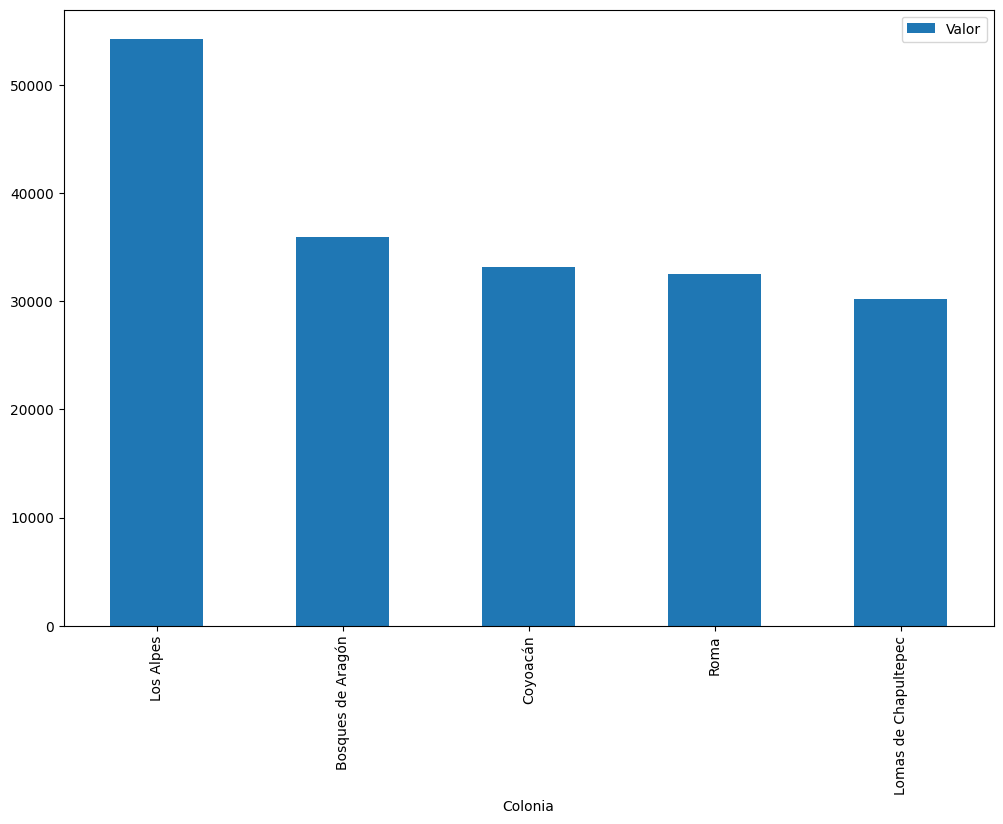

In [111]:
# Generamos un gráfico de barras horizontales para las 5 colonias con el promedio de alquiler más alto
top_5_colonias.plot(kind='bar', figsize=(12,8), x='Colonia', y='Valor')

## NaN values

### Check for 'Nan values'

In [112]:
# Verifcando la cantidad de datos nulos en todo el DataFrame
new_df.isnull()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,True,True
8,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
25111,False,False,False,False,False,False,False,False,False
25113,False,False,False,False,False,False,False,False,False
25114,False,False,False,False,False,False,False,False,False
25118,False,False,False,False,False,False,False,False,False


In [113]:
# Sumamos todos los valores nulos del DataFrame para verificar si hay datos faltantes
new_df.isnull().sum()

Tipo               0
Colonia            0
Habitaciones       0
Garages            0
Suites             0
Area               0
Valor              7
Condominio       493
Impuesto        3797
dtype: int64

## Handling null values
- Replacing null values with a numeric zero (0) as requested by the Machine Learning department

In [114]:
new_df.fillna(0)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [115]:
# Reemplazamos los valores nulos con 0
new_df = new_df.fillna(0)  

# Verificamos nuevamente si hay datos nulos
new_df.isnull().sum() # → resultado: 0, es decir, no hay datos nulos

Tipo            0
Colonia         0
Habitaciones    0
Garages         0
Suites          0
Area            0
Valor           0
Condominio      0
Impuesto        0
dtype: int64

## Inconsistent values
- Departments where the 'Valor' column (serie) is equal to 0
- Departments where the 'Condominio' column (serie) is equal to 0

### Remove/Erase departments with a value of 0 from DataFrame

In [116]:
# Verificamos los tipos de datos de las columnas (Solo para comprobar que no se hayan modificado)
new_df

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [117]:
# Verificamos los valores '0' en las columnas 'Valor' y 'Condominio'
# '|' operador lógico que significa "o" en la consulta
new_df.query('Valor == 0 | Condominio == 0') 


,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
49,Departamento,Santa Fe,2,1,1,70,0.0,3395.0,238.0
74,Departamento,Ciudad de los Deportes,2,0,0,80,3500.0,0.0,0.0
116,Departamento,El Rosedal,2,1,0,50,3850.0,0.0,0.0
136,Departamento,Santa Fe,1,1,1,65,8225.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24721,Departamento,Doctores,2,0,0,43,3150.0,0.0,56.0
24736,Departamento,Condesa,1,0,0,30,9100.0,0.0,0.0
24866,Departamento,Condesa,3,0,0,130,16100.0,0.0,0.0
24892,Departamento,Loma Bonita,1,0,0,40,1925.0,0.0,0.0


In [118]:
# Verificamos los indices de los departamentos con valores '0' en las columnas 'Valor' y 'Condominio'
# Este dato nos permitirá eliminar todas estas filas del DataFrame posteriormente
new_df.query('Valor == 0 | Condominio == 0').index

Index([    7,    49,    74,   116,   136,   185,   199,   432,   504,   527,
       ...
       24426, 24555, 24563, 24597, 24671, 24721, 24736, 24866, 24892, 25014],
      dtype='int64', length=500)

In [119]:
# Creación del dataFrame que contiene los indices de los departamentos con valores '0' en las columnas 'Valor' y 'Condominio'
new_df_remove = new_df.query('Valor == 0 | Condominio == 0').index
type(new_df_remove) 
# → resultado: <class 'pandas.core.indexes.base.Index'>, es decir, un objeto de tipo Index

pandas.core.indexes.base.Index

In [120]:
# Eliminamos las filas 
new_df.drop(new_df_remove, axis=0, inplace=True) # 'inplace=True' modifica el df original 

In [121]:
# Verificamos nuevamente la cantidad de valores nulos en todo el DataFrame
# Corroboramos que no haya valores '0' en las columnas 'Valor' y 'Condominio'
new_df.query('Valor == 0 | Condominio == 0').index

Index([], dtype='int64')

In [122]:
# Verificamos nuevamente si hay datos nulos
new_df.isnull().sum() 

Tipo            0
Colonia         0
Habitaciones    0
Garages         0
Suites          0
Area            0
Valor           0
Condominio      0
Impuesto        0
dtype: int64

In [123]:
# Visualizamos que la columna 'Tipo' maneja para todos el mismo valor, asi que es ya no es necesario (podemos eliminarlo)
new_df.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
13,Departamento,Santa Fe,2,1,1,67,5950.0,2061.5,514.5


In [124]:
# Verificamos los tipos de datos de las columnas (Solo para comprobar que no se hayan modificado)
# new_df['Tipo'].unique() ← El resultado es solo 'departamento', pero como ya se borro lineas abajo con el atributo (inplace=true) ya no aparece

In [125]:
new_df.sample(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
1709,Departamento,Condesa,1,0,0,40,5250.0,1785.0,189.0
7864,Departamento,Condesa,2,0,0,81,8330.0,1400.0,0.0
24249,Departamento,Roma,3,1,1,101,17850.0,4515.0,0.0
10333,Departamento,San Ángel,1,0,0,45,7000.0,2450.0,1225.0
13919,Departamento,Villa de Guadalupe,2,1,2,61,4830.0,2264.5,255.5
3116,Departamento,Lomas de Chapultepec,2,2,1,89,22400.0,6849.5,1529.5
7786,Departamento,Coyoacán,3,1,1,130,12250.0,3958.5,0.0
19307,Departamento,Condesa,1,0,1,37,8050.0,1547.0,77.0
5665,Departamento,Lomas de Chapultepec,3,1,0,90,15575.0,3150.0,700.0
24505,Departamento,Roma,2,1,1,70,21000.0,3150.0,0.0


## APLYING FILTERS

### Apartamentos que tienen **1 dormitorio y un alquiler menor a MXN 4200**.


In [126]:
# Generamos una serie de booleanos para filtrar aquellas filas que cumplan con las condiciones de '1 dormitorio'.
# Quienes cumplan con la condición se visualizarán como 'True'.
# Guardamos la serie en una máscara booleana
seleccion1 = new_df['Habitaciones'] == 1
seleccion1

3         True
4         True
8         True
10       False
13       False
         ...  
25111    False
25113    False
25114     True
25118    False
25119    False
Name: Habitaciones, Length: 14264, dtype: bool

In [127]:
# Esta serie booleana nos permite filtrar el DataFrame para obtener solo los departamentos con 1 dormitorio.
new_df[seleccion1]

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
19,Departamento,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Departamento,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
...,...,...,...,...,...,...,...,...,...
25090,Departamento,Coyoacán,1,0,0,55,7000.0,2205.0,66.5
25092,Departamento,Santa Fe,1,1,0,62,5950.0,3307.5,630.0
25100,Departamento,Lomas de Chapultepec,1,1,1,50,15050.0,6055.0,906.5
25103,Departamento,Condesa,1,0,0,50,6825.0,1575.0,245.0


In [128]:
# Esta máscara booleana nos permite filtrar el DataFrame para obtener solo los departamentos con un alquiler menor a MXN 4200.
seleccion2 = new_df['Valor'] < 4200
new_df[seleccion2]

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Departamento,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Departamento,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Departamento,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...,...
25038,Departamento,Villa de Guadalupe,2,1,0,50,2800.0,1435.0,0.0
25051,Departamento,Nativitas,2,1,0,62,3500.0,1050.0,0.0
25065,Departamento,Nativitas,2,1,0,50,3150.0,1050.0,0.0
25095,Departamento,Lindavista Sur,2,0,0,63,2800.0,1372.0,0.0


In [129]:
# Funcion para visualizar el valor máximo de la máscara booleana 'seleccion2'
new_df[seleccion2].max()

Tipo              Departamento
Colonia         Álvaro Obregón
Habitaciones                 3
Garages                      2
Suites                       2
Area                       176
Valor                   4025.0
Condominio            152575.5
Impuesto                6699.0
dtype: object

In [130]:
# Unimos las dos máscaras booleanas para filtrar los departamentos que cumplen con ambas condiciones
# utilizamos el operador logico '&' (AND)
filtro_1 = seleccion1 & seleccion2

# Aplicamos el filtro al DataFrame para obtener los departamentos que cumplen con las condiciones
new_df[filtro_1]

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Departamento,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Departamento,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Departamento,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...,...
24710,Departamento,Nativitas,1,0,0,40,3150.0,1522.5,0.0
24872,Departamento,Peralvillo,1,0,1,69,3150.0,2240.0,441.0
24880,Departamento,La Condesa,1,0,0,46,3850.0,1585.5,112.0
24943,Departamento,Roma,1,0,0,21,3500.0,987.0,87.5


In [144]:
# Guardamos el DataFrame filtrado en una nueva variable para su posterior uso
df1 = new_df[filtro_1].drop(columns=['Tipo']) # Eliminamos la columna 'Tipo' ya que no es necesaria

### Apartamentos que tienen **al menos 2 dormitorios, un alquiler menor a MXN 10500 y una superficie mayor a 70 m².**

- Generación de filtro para hallar 2 o mas dormitorios

In [132]:
# Esta máscara booleana nos permite filtrar el DataFrame para obtener los departamentos con 2 dormitorio o más.
# Guardamos la máscara en la variable 'seleccion3'
seleccion3 = new_df['Habitaciones'] >= 2
seleccion3

3        False
4        False
8        False
10        True
13        True
         ...  
25111     True
25113     True
25114    False
25118     True
25119     True
Name: Habitaciones, Length: 14264, dtype: bool

- Generación de filtro para hallar valores menores a 10,500

In [133]:
# Esta máscara booleana nos permite filtrar el DataFrame para obtener los departamentos con valor menor a 10,500
# Guardamos la máscara en la variable 'seleccion4'
seleccion4 = new_df['Valor'] < 10500
seleccion4

3         True
4         True
8         True
10       False
13        True
         ...  
25111    False
25113    False
25114     True
25118     True
25119    False
Name: Valor, Length: 14264, dtype: bool

In [134]:
# Verificando cantidad de valores
seleccion4.value_counts()

Valor
False    7882
True     6382
Name: count, dtype: int64

- Generación de filtro para hallar departamentos con superficie mayor a 70 m2

In [135]:
# Esta máscara booleana nos permite filtrar el DataFrame para obtener los departamentos con valores que cumplan con dicho filtro
seleccion5 = new_df['Area'] > 70
seleccion5

3        False
4        False
8        False
10        True
13       False
         ...  
25111     True
25113     True
25114    False
25118    False
25119    False
Name: Area, Length: 14264, dtype: bool

In [136]:
# Almacenamos todos los filtros juntos ya que deben aplicarse de forma conjunta.
filtro_2 = seleccion3 & seleccion4 & seleccion5

In [137]:
# Visualizamos los datos que cumplen con el filtro 'filtro_2'
new_df[filtro_2]

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
14,Departamento,Narvarte,2,1,0,110,6650.0,2450.0,483.0
16,Departamento,Narvarte,2,1,0,78,7000.0,2450.0,0.0
21,Departamento,Roma,2,1,0,76,8750.0,2590.0,0.0
33,Departamento,Santa Fe,3,1,1,72,8225.0,2100.0,245.0
58,Departamento,Santa Fe,3,2,1,104,9100.0,4774.0,1421.0
...,...,...,...,...,...,...,...,...,...
25028,Departamento,Del Valle,2,0,1,90,7700.0,1890.0,483.0
25062,Departamento,Santa Fe,2,1,1,72,5950.0,3045.0,560.0
25063,Departamento,Narvarte,3,1,0,75,6650.0,3010.0,493.5
25105,Departamento,Santa Fe,2,1,1,85,7875.0,5463.5,689.5


In [147]:
# Guardamos la condicion en una variable
df2 = new_df[filtro_2].drop(columns=['Tipo']) # Eliminamos la columna 'Tipo' ya que no es necesaria

## SAVING DATA

### Store the complete DataFrame(s) in .CSV format after all modifications have been made.

In [161]:
# Creamos un archivo CSV con los datos filtrados
# Se guardará en el directorio actual ya que no se especifica una ruta
# Se sobreescribirá el archivo si ya existe
path = '../../../datasets/processed_dataframes/inmuebles_residenciales_ml.csv'
# 'index=False' evita que se guarde el índice del DataFrame en el archivo CSV
new_df.to_csv(path,sep=';', index=False)

- Store CSV dataframes at datasets/processed_dataframes directory

In [140]:
# Verificamos el archivo creado
pd.read_csv(path, sep=';')   

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
1,Del Valle,1,0,0,48,2800.0,805.0,0.0
2,Condesa,1,0,1,40,7000.0,1963.5,175.0
3,Condesa,4,3,1,243,45500.0,7000.0,2810.5
4,Santa Fe,2,1,1,67,5950.0,2061.5,514.5
...,...,...,...,...,...,...,...,...
14259,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
14260,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
14261,Narvarte,1,0,0,28,3500.0,1260.0,87.5
14262,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [148]:
# Creamos archivos CSV con los datos filtrados
# Se guardarán en otro directorio ya que se especifica una ruta
# Se sobreescribirá el archivo si ya existe

path1 = '../../../datasets/processed_dataframes/inmuebles_residenciales_ml_filtro_1.csv'
path2 = '../../../datasets/processed_dataframes/inmuebles_residenciales_ml_filtro_2.csv'

df1.to_csv(path1,sep=';', index=False)
df2.to_csv(path2,sep=';', index=False)

In [146]:
# Verificacion visual del archivo creado para 'filtro_1'
pd.read_csv(path1, sep=';')

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
1,Del Valle,1,0,0,48,2800.0,805.0,0.0
2,Narvarte,1,0,0,48,2625.0,2702.0,87.5
3,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
4,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...
356,Nativitas,1,0,0,40,3150.0,1522.5,0.0
357,Peralvillo,1,0,1,69,3150.0,2240.0,441.0
358,La Condesa,1,0,0,46,3850.0,1585.5,112.0
359,Roma,1,0,0,21,3500.0,987.0,87.5


In [149]:
# Verificacion visual del archivo creado para 'filtro_2'
pd.read_csv(path2, sep=';')

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Narvarte,2,1,0,110,6650.0,2450.0,483.0
1,Narvarte,2,1,0,78,7000.0,2450.0,0.0
2,Roma,2,1,0,76,8750.0,2590.0,0.0
3,Santa Fe,3,1,1,72,8225.0,2100.0,245.0
4,Santa Fe,3,2,1,104,9100.0,4774.0,1421.0
...,...,...,...,...,...,...,...,...
2638,Del Valle,2,0,1,90,7700.0,1890.0,483.0
2639,Santa Fe,2,1,1,72,5950.0,3045.0,560.0
2640,Narvarte,3,1,0,75,6650.0,3010.0,493.5
2641,Santa Fe,2,1,1,85,7875.0,5463.5,689.5


# DEV TASKS

## Numeric columns creation

###  Valor_mensual Column creation
- gastos mensuales de cada propiedad + alquiler + condominio

In [156]:
# Lectura de datos (carga de URL utilizada al principio del notebook))
df = pd.read_csv(url, sep=';') # utilizo ';' ya que segun el dataframe estan separados por ese símbolo.
df.head() # visualizacion solo de las 5 primeras filas

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [157]:
# Guardamos el DataFrame en una variable para su posterior uso
df_dev = df.copy()  # Creamos una copia del DataFrame original para evitar modificarlo directamente

df_dev.shape

(25121, 9)

In [158]:
# Creacion de la columna ' valor_mensual'
df_dev['Valor_mensual'] = df_dev['Valor'] + df_dev['Condominio']
df_dev.shape # Corroboramos que se ha añadido una nueva columna (x,10)
df_dev.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0


###  Valor_anual Column creation
- gasto anual por propiedad es decir, el impuesto + 12 meses de alquiler y condominio).

In [160]:
# Creacion de la columna 'Valor_anual'
df_dev['Valor_anual'] = df_dev['Impuesto'] + (df_dev['Valor_mensual'] * 12) + df_dev['Condominio']
# Verificamos los últimos registros del DataFrame.
df_dev.tail()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5,4025.0,49612.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5,6681.5,82089.0
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN,13160.0,NaN
25120,Conjunto Comercial/Sala,Centro Histórico,0,0,0,250,22750.0,14721.0,3881.5,37471.0,468254.5


## Categoric columns creation

###  Descripcion Column creation
- Esta columna debe contener un **resumen** de la información clave de las propiedades que se mostrarán en el sitio web: 
```
tipo de propiedad, barrio, cantidad de habitaciones y plazas de estacionamiento.
```

In [174]:
# Concatenamos todas las columnas de tipo categorico para crear una nueva columna 'Descripcion'
# Utilizamos 'astype(str)' para convertir los valores numéricos a cadenas de texto.
df_dev['Descripcion'] = df_dev['Tipo'] + ' en la colonia ' + df_dev['Colonia'] + \
      ' con ' + df_dev['Habitaciones'].astype(str) + ' dormitorio(s) y ' + \
        df_dev['Garages'].astype(str) + ' plaza(s) de estacionamiento.'
df_dev.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,94360.0,Cocineta en la colonia Condesa con 1 dormitori...
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 dormitorio(s)...
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,405198.5,Conjunto Comercial/Sala en la colonia Santa Fe...
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,51415.0,Departamento en la colonia Centro Histórico co...
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en la colonia Del Valle con 1 dor...


In [175]:
# Verificacion del contenido de una celda en especifico de la columna 'Descripcion'
# Colocamos como ejemplo la fila número 500
df_dev.iloc[500].Descripcion

'Departamento en la colonia Napoles con 1 dormitorio(s) y 0 plaza(s) de estacionamiento.'

###  Tiene_suite Column creation
- Esta debe ser una columna que indique únicamente si la propiedad tiene o no suites, sin importar la cantidad.

In [177]:
# Generamos  la columna 'Tiene-suite' utilizando una funcion anónima (lambda) para indicar si la propiedad tiene o no suites, sin importar la cantidad.
df_dev['Tiene_suite'] = df_dev['Suites'].apply(lambda x: 'Si' if x > 0 else 'No')
df_dev 

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion,Tiene_suite
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,94360.0,Cocineta en la colonia Condesa con 1 dormitori...,No
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 dormitorio(s)...,Si
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,405198.5,Conjunto Comercial/Sala en la colonia Santa Fe...,No
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,51415.0,Departamento en la colonia Centro Histórico co...,No
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en la colonia Del Valle con 1 dor...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN,NaN,NaN,Cochera/Estacionamiento en la colonia Centro H...,No
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5,4025.0,49612.5,Cocineta en la colonia Centro Histórico con 0 ...,No
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5,6681.5,82089.0,Departamento en la colonia Mixcoac con 2 dormi...,No
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN,13160.0,NaN,Departamento en la colonia Lomas de Chapultepe...,No


## Saving dataFrame

### Store the complete DataFrame(s) in .CSV format after all modifications have been made.

In [180]:
path3 = '../../../datasets/processed_dataframes/inmuebles_dev.csv'

#  ';' usamos el mismo símbolo que usa el dataframe original.
df_dev.to_csv(path3, index=False, sep=';')